### Assignment 4

First import the basic libraries for image processing. 

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.linalg import inv

#### Initialise and normalise the data
We first retrieve all the relevant information from 69dataset. The images are stored in the matrix X, the responses in the matrix Y and the prior image data in the matrix X_prior. Next we normalize these matrices by subtracting the mean of each voxel/pixel from itself and dividing that over the standard deviation of the respective pixel/voxel. In some cases we get nan's since many pixel are zeros and there respective means and std's will be zero as well. We replace these nan's with zeros as a postprocessing step. We then split the X and Y matrices into train and test sets.

In [87]:
# Load the data
data = loadmat('69dataset.mat')
X = data['X']
Y = data['Y']
X_prior = data['prior']
# Compute the mean and std's of the images and voxels
X_mean, X_std  = np.reshape(np.mean(X,axis=0),(1,784)), np.reshape(np.std(X,axis=0),(1,784))
Y_mean, Y_std = np.reshape(np.mean(Y,axis=0),(1,3092)), np.reshape(np.std(Y,axis=0),(1,3092))
Xp_mean, Xp_std  = np.reshape(np.mean(X_prior,axis=0),(1,784)), np.reshape(np.std(X_prior,axis=0),(1,784))

# Normalize the data
X_norm = (X - X_mean) / X_std
X_norm[np.isnan(X_norm)] = 0
Y_norm = (Y - Y_mean) / Y_std
X_normp = (X_prior - Xp_mean) / Xp_std
X_normp[np.isnan(X_normp)] = 0

#Split the data into train and test sets
X_train, X_test = np.concatenate((X_norm[10:50,:], X_norm[50:90,:])), np.concatenate((X_norm[0:10,:], X_norm[90:-1,:]))
Y_train, Y_test = np.concatenate((Y_norm[10:50,:], Y_norm[50:90,:])), np.concatenate((Y_norm[0:10,:], Y_norm[90:-1,:]))

/home/abdullahi/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in divide
  if sys.path[0] == '':
/home/abdullahi/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


#### Exercise 1

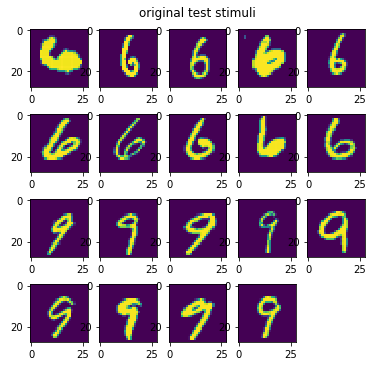

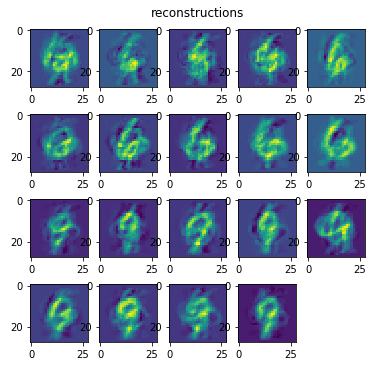

In [88]:
# Excercise 1
I_l = np.mat(10**-6 * np.identity(3092))
B = inv(np.mat(Y_train).T * np.mat(Y_train) + I_l) * np.mat(Y_train).T * np.mat(X_train)

x_test = B.T * Y_test.T
# Reconstruct normalized images
x_test = np.array(x_test).T*X_std + X_mean
X_test = X_test * X_std + X_mean

# actual images
fig1 = plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('original test stimuli')
for i in range(19):
    image = np.reshape(X_test[i,:],(28,28)).T
    sub = fig1.add_subplot(4,5,i+1)
    sub.imshow(image)

# reconstructed images excercise 1
fig2 = plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('reconstructions')
for i in range(19):
    image = np.reshape(x_test[i,:],(28,28)).T
    sub = fig2.add_subplot(4,5,i+1)
    sub.imshow(image)



### Exercise 2.1: estimate B and visualise Sigma_prior


In [95]:
sigma = np.mat(10**-3 * np.identity(784)) #covariance matrix
I_l = np.mat(10**-6 * np.identity(784))

B = inv(np.mat(X_train).T * np.mat(X_train) + I_l)\
    * np.mat(X_train).T * np.mat(Y_train)
sigma_prior = (np.mat(X_normp).T * np.mat(X_normp)) / (2000- 1) \
+ np.mat(10**-6*np.identity(784))



### Visualisation of Sigma_prior
Below, you can find a visualisation of Sigma_prior. Sigma_prior is a prior assumption on how all the pixels in the images correlate with each other. Naturally, this correlation is the strongest on the diagonal, since there we measure the auto-correlation of each pixel. The correlation is strongest towards the center of the image and diffuses towards the egde of image, which can be explained by the fact that the interesting information (i.e. the digit) is in the center of the image.

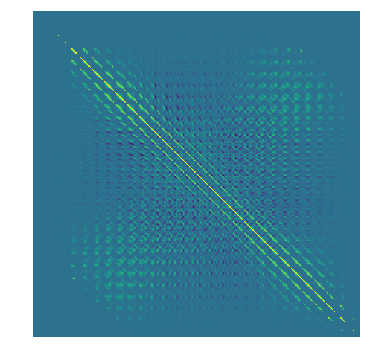

In [96]:
# visualize sigma prior
fig = plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(sigma_prior)

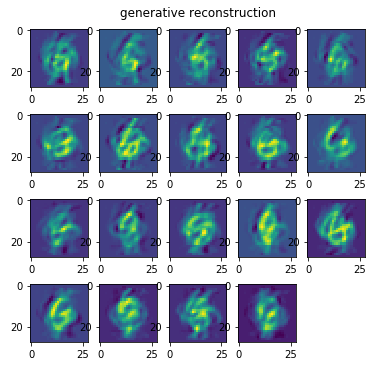

In [97]:
# Excercise 2
mu_post = ((inv(inv(sigma_prior) + (B.T*inv(sigma)).T*B.T) \
*B).T*inv(sigma)).T*np.mat(Y_test).T
recon_im = np.array(mu_post).T*X_std + X_mean
fig = plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('generative reconstruction')
for i in range(19):
    image = np.reshape(recon_im[i,:],(28,28)).T
    sub = fig.add_subplot(4,5,i+1)
    sub.imshow(image)